In [128]:
import pandas as pd 
import numpy as np

In [129]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

# 1. Exploratory Data Analysis

In [130]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [131]:
lenght = df.shape[0]
print(lenght)
df.isnull().sum()

23486


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Since we have to do Sentiment analysis on Feedback(E-Commerce Reviews), We jut need column Review Text and Rating. I'm dropping only that rows that have *NAN in column Review Text.* also dropping all the other columns that are not required here.

In [132]:
df_new = df[['Review Text', 'Rating']]
df_new = df_new.dropna(subset=['Review Text'])

In [133]:
print(df_new.head())
print(df_new.shape[0])
print(df_new.isnull().sum())

                                         Review Text  Rating
0  Absolutely wonderful - silky and sexy and comf...       4
1  Love this dress!  it's sooo pretty.  i happene...       5
2  I had such high hopes for this dress and reall...       3
3  I love, love, love this jumpsuit. it's fun, fl...       5
4  This shirt is very flattering to all due to th...       5
22641
Review Text    0
Rating         0
dtype: int64


In [134]:
print("Rating Distribution: ")
df_new['Rating'].value_counts().sort_index()

Rating Distribution: 


Rating
1      821
2     1549
3     2823
4     4908
5    12540
Name: count, dtype: int64

In [135]:
df_new['Total_Char_Count'] = df_new['Review Text'].apply(lambda x: sum(len(word) for word in x.split()) if x else 0)
df_new['word_count'] = df_new['Review Text'].apply(lambda x: len(x.split()) if x else 0)
print(df_new.head())
avg_word_count = df_new['word_count'].mean()
avg_char_count = df_new['Total_Char_Count'].mean()
print(f"avg char count and word count is: {avg_char_count}, {avg_word_count} ")


                                         Review Text  Rating  \
0  Absolutely wonderful - silky and sexy and comf...       4   
1  Love this dress!  it's sooo pretty.  i happene...       5   
2  I had such high hopes for this dress and reall...       3   
3  I love, love, love this jumpsuit. it's fun, fl...       5   
4  This shirt is very flattering to all due to th...       5   

   Total_Char_Count  word_count  
0                46           8  
1               237          62  
2               403          98  
3               103          22  
4               157          36  
avg char count and word count is: 249.12150523386777, 60.19667859193498 


In [136]:
df_new = df_new.drop(["Total_Char_Count", "word_count"], axis=1)

# Sentiment Analysis 

## 1. Using Rating

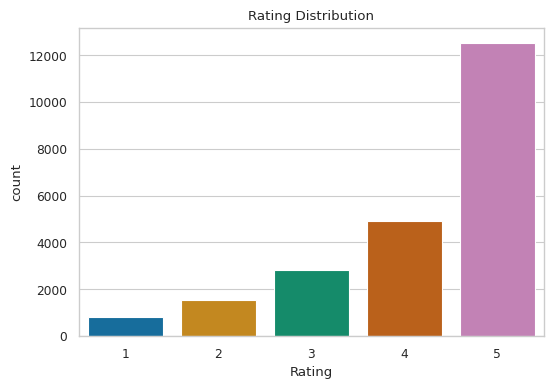

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns   

plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df_new, order=sorted(df_new['Rating'].unique()))
plt.title("Rating Distribution")
plt.show()

In [138]:
def rating_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    elif rating in [4, 5]:
        return 'positive'
    else:
        return 'unknown'

In [139]:
df_new['Rating_Sentiment'] = df_new['Rating'].apply(rating_sentiment)
df_new.head()

,Review Text,Rating,Rating_Sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,positive
1,Love this dress! it's sooo pretty. i happene...,5,positive
2,I had such high hopes for this dress and reall...,3,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive
4,This shirt is very flattering to all due to th...,5,positive


In [140]:
print(df_new['Rating_Sentiment'].value_counts())

Rating_Sentiment
positive    17448
neutral      2823
negative     2370
Name: count, dtype: int64


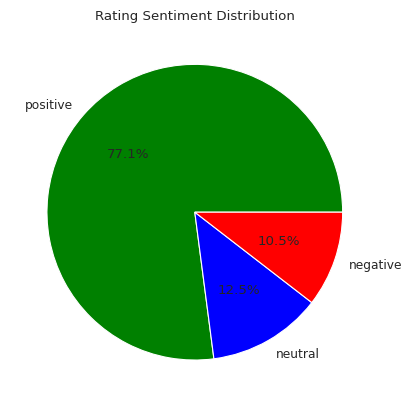

In [141]:
plt.pie(df_new['Rating_Sentiment'].value_counts(), labels=df_new['Rating_Sentiment'].value_counts().index, autopct='%1.1f%%', colors=['green', 'blue', 'red'])
plt.title("Rating Sentiment Distribution") 
plt.show()

### Prepocessing the DATA

In [142]:
import nltk
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [143]:
def preprocess_text(text):

    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join(text.split())
    return text

df_new['preprocess_text'] = df_new['Review Text'].apply(preprocess_text)

for i in range(2):
    print(f"\nOriginal: {df_new['Review Text'].iloc[i][:100]}...")
    print(f"Cleaned:  {df_new['preprocess_text'].iloc[i][:100]}...")


Original: Absolutely wonderful - silky and sexy and comfortable...
Cleaned:  absolutely wonderful silky and sexy and comfortable...

Original: Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never...
Cleaned:  love this dress its sooo pretty i happened to find it in a store and im glad i did bc i never would ...


## 2. Using VADER

In [144]:
%%time
vader_model = SentimentIntensityAnalyzer()
df_new["vader_scores"] = df_new["preprocess_text"].apply(
    lambda text: vader_model.polarity_scores(text)
)
print(f"Number of rows: {len(df_new)}")

Number of rows: 22641
CPU times: user 9.7 s, sys: 10 ms, total: 9.71 s
Wall time: 9.71 s


In [145]:
df_new["vader_polarity"] = df_new["vader_scores"].apply(
    lambda score_dict: score_dict["compound"]
)

df_new["vader_sentiment"] = pd.cut(
    df_new["vader_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)


In [146]:
df_new['vader_sentiment'].value_counts()

vader_sentiment
Positive    20332
Neutral      1297
Negative     1012
Name: count, dtype: int64

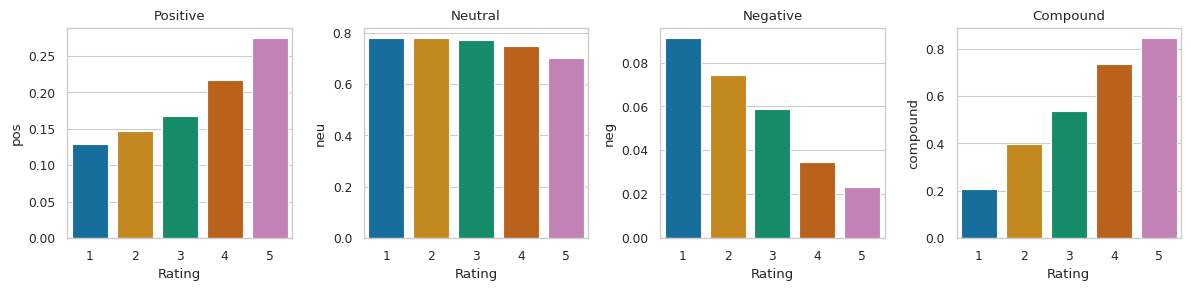

In [147]:
# Aggregate VADER scores by rating and plot
if not set(['neg', 'neu', 'pos', 'compound']).issubset(df_new.columns):
    scores_df = df_new['vader_scores'].apply(pd.Series)
    for c in ['neg', 'neu', 'pos', 'compound']:
        if c in scores_df.columns and c not in df_new.columns:
            df_new[c] = scores_df[c]

fig, axs = plt.subplots(1, 4, figsize=(12, 3))
sns.barplot(data=df_new, x='Rating', y='pos', estimator=np.mean, errorbar=None, ax=axs[0])
sns.barplot(data=df_new, x='Rating', y='neu', estimator=np.mean, errorbar=None, ax=axs[1])
sns.barplot(data=df_new, x='Rating', y='neg', estimator=np.mean, errorbar=None, ax=axs[2])
sns.barplot(data=df_new, x='Rating', y='compound', estimator=np.mean, errorbar=None, ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

In [148]:
df_new.head()

,Review Text,Rating,Rating_Sentiment,preprocess_text,vader_scores,vader_polarity,vader_sentiment,neg,neu,pos,compound
0,Absolutely wonderful - silky and sexy and comf...,4,positive,absolutely wonderful silky and sexy and comfor...,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,Positive,0.000,0.272,0.728,0.8932
1,Love this dress! it's sooo pretty. i happene...,5,positive,love this dress its sooo pretty i happened to ...,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.9719,Positive,0.000,0.662,0.338,0.9719
2,I had such high hopes for this dress and reall...,3,neutral,i had such high hopes for this dress and reall...,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co...",0.9398,Positive,0.027,0.794,0.179,0.9398
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive,i love love love this jumpsuit its fun flirty ...,"{'neg': 0.231, 'neu': 0.346, 'pos': 0.423, 'co...",0.4805,Positive,0.231,0.346,0.423,0.4805
4,This shirt is very flattering to all due to th...,5,positive,this shirt is very flattering to all due to th...,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9162,Positive,0.000,0.713,0.287,0.9162


## Using roBERTa

In [149]:
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax
import torch
import torch.nn as nn
import torch.optim as optim

In [22]:
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

def roberta_sentiment_analyzer(text, model):

    encoded_input = tokenizer(text, return_tensors="pt")
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = np.round(softmax(scores), 2)
    scores_dict = {"neg": scores[0], "neu": scores[1], "pos": scores[2]}
    return scores_dict

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

2025-09-30 11:23:50.568116: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759231430.742737      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759231430.794745      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
%%time
df_new["probabilities"] = df_new["preprocess_text"].apply(
    roberta_sentiment_analyzer, model=roberta_model
)

CPU times: user 1h 17min 1s, sys: 21.5 s, total: 1h 17min 23s
Wall time: 38min 42s


In [150]:
polarity_weights = torch.tensor([-1, 0, 1], dtype=torch.float32)
probs = torch.tensor(df_new[["neg", "neu", "pos"]].values, dtype=torch.float32)

polarity = probs @ polarity_weights
polarity_scaled = torch.tanh(polarity)

df_new["roberta_polarity"] = polarity_scaled.detach().numpy()
df_new["roberta_sentiment"] = pd.cut(
    df_new["roberta_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],
    labels=["Negative", "Neutral", "Positive"],
)

In [151]:
df_new.head()

,Review Text,Rating,Rating_Sentiment,preprocess_text,vader_scores,vader_polarity,vader_sentiment,neg,neu,pos,compound,roberta_polarity,roberta_sentiment
0,Absolutely wonderful - silky and sexy and comf...,4,positive,absolutely wonderful silky and sexy and comfor...,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,Positive,0.000,0.272,0.728,0.8932,0.621840,Positive
1,Love this dress! it's sooo pretty. i happene...,5,positive,love this dress its sooo pretty i happened to ...,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.9719,Positive,0.000,0.662,0.338,0.9719,0.325691,Positive
2,I had such high hopes for this dress and reall...,3,neutral,i had such high hopes for this dress and reall...,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co...",0.9398,Positive,0.027,0.794,0.179,0.9398,0.150840,Neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",5,positive,i love love love this jumpsuit its fun flirty ...,"{'neg': 0.231, 'neu': 0.346, 'pos': 0.423, 'co...",0.4805,Positive,0.231,0.346,0.423,0.4805,0.189675,Neutral
4,This shirt is very flattering to all due to th...,5,positive,this shirt is very flattering to all due to th...,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9162,Positive,0.000,0.713,0.287,0.9162,0.279371,Positive


/tmp/ipykernel_36/630389025.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new["roberta_polarity"], color="r", shade=True, legend="roberta_polarity")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/630389025.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_new["vader_polarity"], color="b", shade=True, legend="vader_polaroty")
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

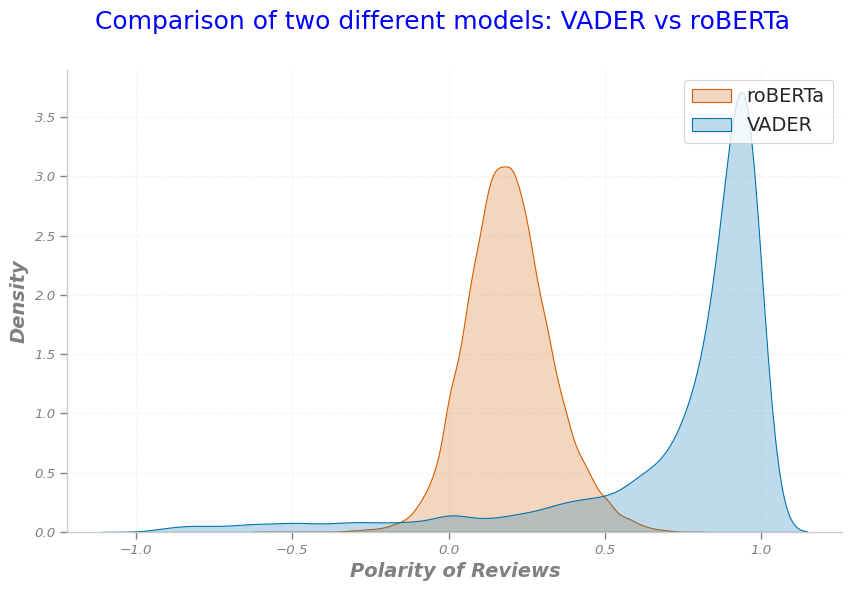

In [160]:
# Plotting the KDE Plot
fig = plt.figure(figsize=(10, 6))
sns.set("paper", "whitegrid", "colorblind")
sns.kdeplot(df_new["roberta_polarity"], color="r", shade=True, legend="roberta_polarity")
sns.kdeplot(df_new["vader_polarity"], color="b", shade=True, legend="vader_polaroty")
sns.despine(right=True, top=True)
plt.tick_params(
    reset=True,
    top=False,
    right=False,
    color="gray",
    labelcolor="gray",
    grid_alpha=0.2,
    grid_linestyle="--",
)
plt.xticks(**{"fontsize": 14, "font": "Arial", "fontstyle": "italic"})
plt.yticks(**{"fontsize": 14, "font": "Arial", "fontstyle": "italic"})
plt.xlabel(
    "Polarity of Reviews",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.ylabel(
    "Density",
    font="Arial",
    fontstyle="italic",
    weight="bold",
    fontsize=14,
    color="gray",
)
plt.legend(["roBERTa", "VADER"], bbox_to_anchor=(1, 1.0), fontsize=14)
plt.suptitle(
    "Comparison of two different models: VADER vs roBERTa",
    fontsize=18,
    color="blue",
)
plt.show()

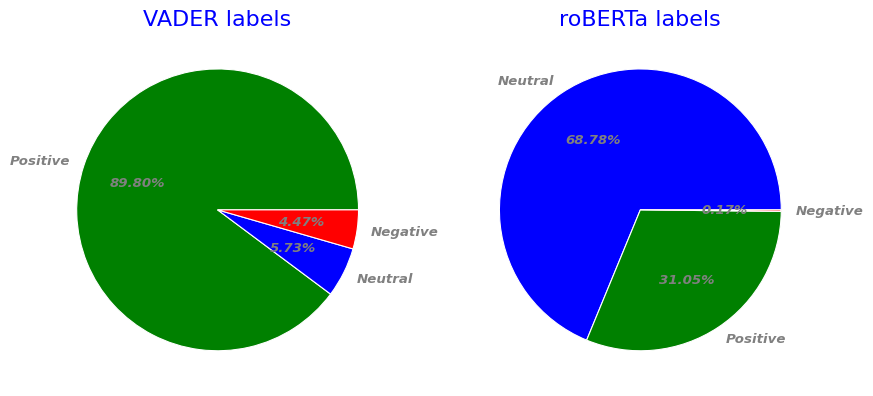

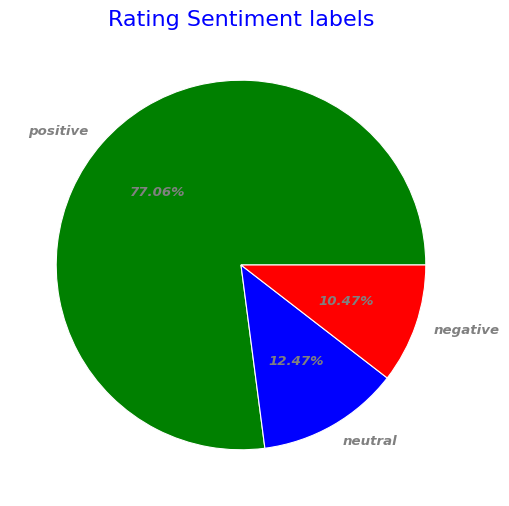

In [157]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
df_new["vader_sentiment"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.2f%%",
    colors=["green", "blue", "red"],
    textprops={
        "fontsize": 14,
        "font": "Arial",
        "fontstyle": "italic",
        "weight": "bold",
        "color": "gray",
    }
)
plt.title("VADER labels", fontsize=16, color="blue")
plt.ylabel("")
plt.legend().remove()

plt.subplot(122)
df_new["roberta_sentiment"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.2f%%",
    colors=["blue", "green", "red"],
    textprops={
        "fontsize": 14,
        "font": "Arial",
        "fontstyle": "italic",
        "weight": "bold",
        "color": "gray",
    }
)
plt.title("roBERTa labels", fontsize=16, color="blue")
plt.ylabel("")
plt.legend().remove()

plt.figure(figsize=(10, 6))
df_new["Rating_Sentiment"].value_counts(normalize=True).plot(
    kind="pie",
    autopct="%.2f%%",
    colors=["green", "blue", "red"],
    textprops={
        "fontsize": 14,
        "font": "Arial",
        "fontstyle": "italic",
        "weight": "bold",
        "color": "gray",
    }
)
plt.title("Rating Sentiment labels", fontsize=16, color="blue")
plt.ylabel("")
plt.legend().remove()


plt.show()